## Kernel-PCA

Генерируем данные

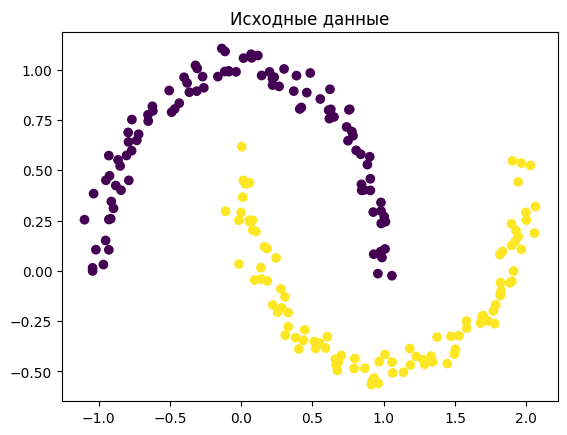

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Исходные данные')
plt.show()


In [9]:
from PCA import PCA

pca = PCA(X)
X_pca, eigenvalues_pca, eigenvectors_pca = pca.pca_qr(n_components=2)

In [10]:
from KernelPCA import *
X_kpca_poly = kernel_pca(X, kernel_function=polynomial_kernel, n_components=2)
X_kpca_rbf = kernel_pca(X, kernel_function=lambda X: rbf_kernel(X, gamma=15), n_components=2)
X_kpca_sigmoid = kernel_pca(X, kernel_function=sigmoid_kernel, n_components=2)
X_kpca_laplacian = kernel_pca(X, kernel_function=lambda X: laplacian_kernel(X, gamma=15), n_components=2)


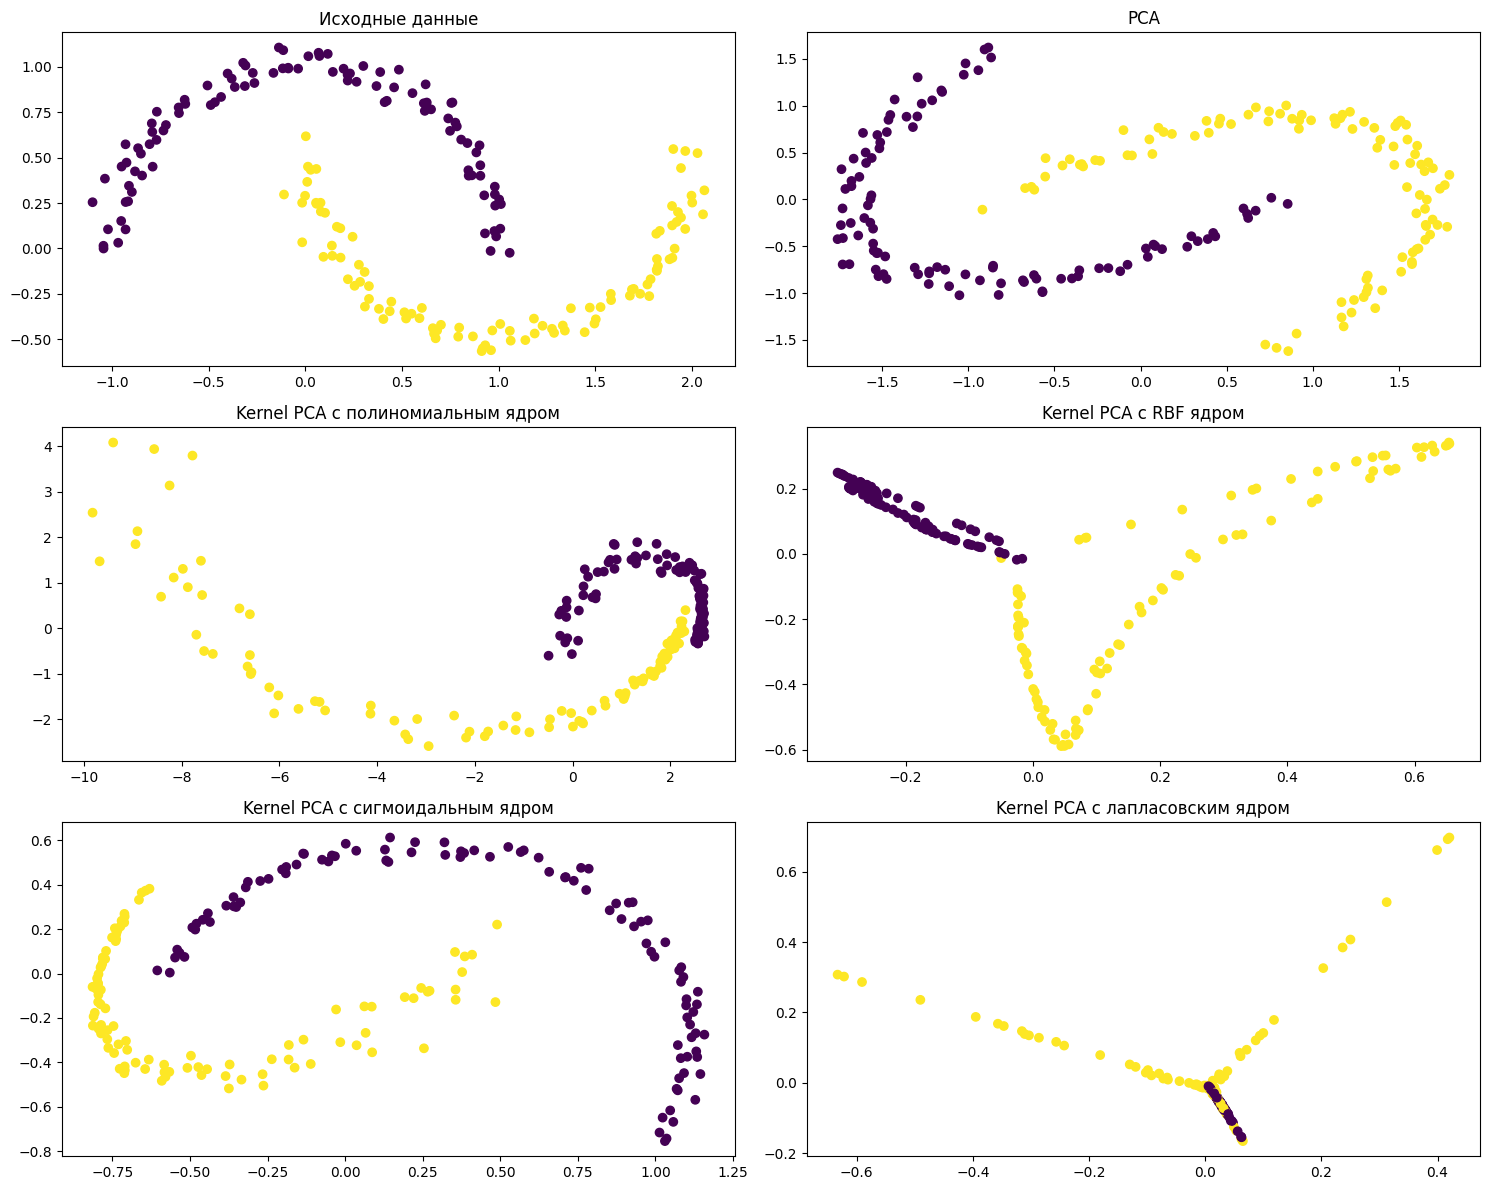

In [11]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Исходные данные')

plt.subplot(3, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA')

plt.subplot(3, 2, 3)
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y)
plt.title('Kernel PCA с полиномиальным ядром')

plt.subplot(3, 2, 4)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=y)
plt.title('Kernel PCA с RBF ядром')

plt.subplot(3, 2, 5)
plt.scatter(X_kpca_sigmoid[:, 0], X_kpca_sigmoid[:, 1], c=y)
plt.title('Kernel PCA с сигмоидальным ядром')

plt.subplot(3, 2, 6)
plt.scatter(X_kpca_laplacian[:, 0], X_kpca_laplacian[:, 1], c=y)
plt.title('Kernel PCA с лапласовским ядром')

plt.tight_layout()
plt.show()

Нетрудно заметить, что на графике KernelPCA с RBF ядром данные стали очень даже линейно разделимыми. Это необходимо подтвердить метриками качества классификации.

## Анализ метрик обучения перцептрона

In [12]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.array([1 if i == 1 else 0 for i in y])
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [13]:
perceptron_original = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_original.fit(X, y)
y_pred_original = perceptron_original.predict(X)
accuracy_original = accuracy(y, y_pred_original)

perceptron_pca = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_pca.fit(X_pca, y)
y_pred_pca = perceptron_pca.predict(X_pca)
accuracy_pca = accuracy(y, y_pred_pca)

perceptron_kpca_poly = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_kpca_poly.fit(X_kpca_poly, y)
y_pred_kpca_poly = perceptron_kpca_poly.predict(X_kpca_poly)
accuracy_kpca_poly = accuracy(y, y_pred_kpca_poly)

perceptron_kpca_rbf = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_kpca_rbf.fit(X_kpca_rbf, y)
y_pred_kpca_rbf = perceptron_kpca_rbf.predict(X_kpca_rbf)
accuracy_kpca_rbf = accuracy(y, y_pred_kpca_rbf)

perceptron_kpca_sigmoid = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_kpca_sigmoid.fit(X_kpca_sigmoid, y)
y_pred_kpca_sigmoid = perceptron_kpca_sigmoid.predict(X_kpca_sigmoid)
accuracy_kpca_sigmoid = accuracy(y, y_pred_kpca_sigmoid)

perceptron_kpca_laplacian = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_kpca_laplacian.fit(X_kpca_laplacian, y)
y_pred_kpca_laplacian = perceptron_kpca_laplacian.predict(X_kpca_laplacian)
accuracy_kpca_laplacian = accuracy(y, y_pred_kpca_laplacian)

In [14]:

print("Сравнение точности классификации:")
print(f"Исходные данные: {accuracy_original:.2f}")
print(f"PCA: {accuracy_pca:.2f}")
print(f"Kernel PCA с полиномиальным ядром: {accuracy_kpca_poly:.2f}")
print(f"Kernel PCA с RBF ядром: {accuracy_kpca_rbf:.2f}")
print(f"Kernel PCA с сигмоидальным ядром: {accuracy_kpca_sigmoid:.2f}")
print(f"Kernel PCA с лапласовским ядром: {accuracy_kpca_laplacian:.2f}")

Сравнение точности классификации:
Исходные данные: 0.87
PCA: 0.74
Kernel PCA с полиномиальным ядром: 0.71
Kernel PCA с RBF ядром: 0.99
Kernel PCA с сигмоидальным ядром: 0.84
Kernel PCA с лапласовским ядром: 0.72


Нетрудно заметить, что качество классификации значительно выросло после применения KernelPCA с ядром RBF